<a href="https://colab.research.google.com/github/Inhusa/AI-class/blob/main/5%20week/DL_classification_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DL_categorical_data
- 심장 데이터로 심장질환 예측하기   
- Data 유형 : *Binary Classification*   

#### 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 데이터 로드  

In [2]:
url = "https://raw.githubusercontent.com/Inhusa/AI-class/refs/heads/main/5%20week/heart.csv"
df = pd.read_csv(url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


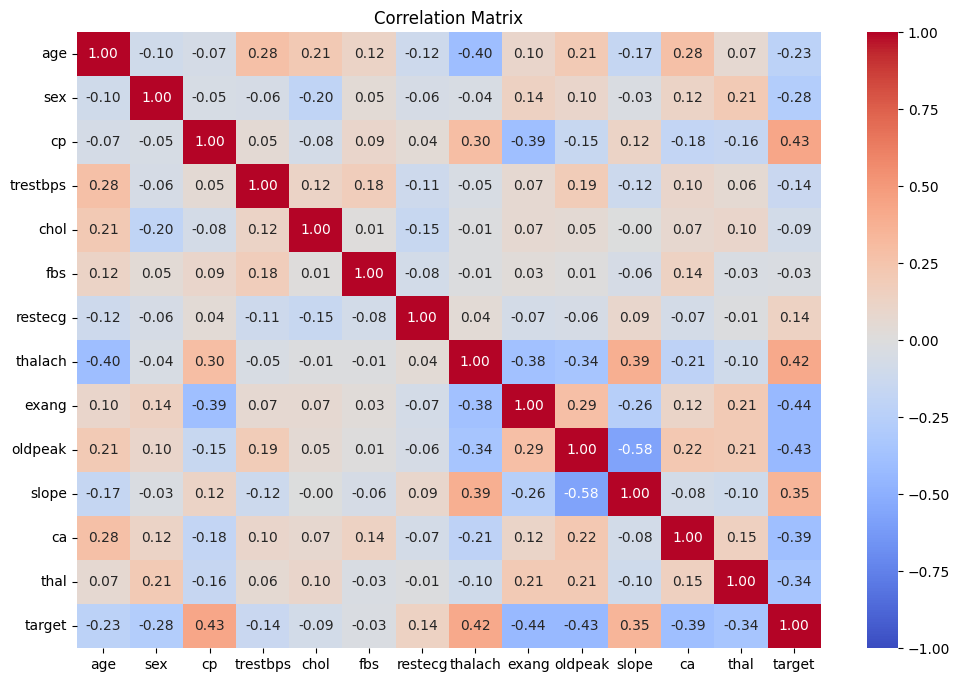

In [4]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(242, 13) (61, 13) (242,) (61,)


#### 신경망 객체 생성 / 구조 생성
- 이진분류    
출력층 ActivationFuntion : sigmoid  
Loss funtion : binary_crossentropy

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

model = Sequential()
model.add(Dense(13, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile( optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,831 (14.96 KB)

 Trainable params: 3,831 (14.96 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=30, validation_data= (X_test,y_test))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7833 - loss: 0.4502 - val_accuracy: 0.8033 - val_loss: 0.4340
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8065 - loss: 0.4328 - val_accuracy: 0.8033 - val_loss: 0.4105
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8318 - loss: 0.4175 - val_accuracy: 0.8361 - val_loss: 0.3723
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7985 - loss: 0.4134 - val_accuracy: 0.8033 - val_loss: 0.3754
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7977 - loss: 0.3875 - val_accuracy: 0.8197 - val_loss: 0.3682
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8228 - loss: 0.3994 - val_accuracy: 0.8033 - val_loss: 0.4007
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8058 - loss: 0.4061 - val_accuracy: 0.8361 - val_loss: 0.3747
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7883 - loss: 0.4302 - val_accuracy: 0.8361 - val_loss: 0.3639
Epoch 

In [24]:
model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.02532885],
       [0.7580212 ],
       [1.        ],
       [0.9843885 ],
       [0.7124158 ],
       [0.9997056 ],
       [0.7196202 ],
       [0.0017452 ],
       [0.01014199],
       [0.46437323],
       [0.42363703],
       [0.11455135],
       [0.78187984],
       [0.07622711],
       [0.97953576],
       [0.9092808 ],
       [0.99879104],
       [0.15337569],
       [0.01113731],
       [0.01236741],
       [0.36884132],
       [0.04437431],
       [0.11115475],
       [0.36751688],
       [0.75230193],
       [0.6670885 ],
       [0.507844  ],
       [0.80708414],
       [0.00670365],
       [0.7252691 ],
       [0.06649141],
       [0.07609509],
       [0.01394527],
       [0.26282942],
       [0.5714386 ],
       [0.15899517],
       [0.76123965],
       [0.7935824 ],
       [0.9037009 ],
       [0.8391172 ],
       [0.27441952],
       [0.74266326],
       [0.8115144 ],
       [0.7701297 ],
       [0.7831008 ],
       [0.01781159],
       [0.67545056],
       [0.921

last_layer = sigmoid이므로 이는 확률로 나타내는 것을 확인할 수 있다. 따라서 혼동행렬로 표현 할시에는 0.5 기준으로 보다크면 1 작으면 0 으로 분류를 하게 만들어야 한다.

#### 시각화(평가지표)  
- 분류이므로 정확도 / 손실함수 / 혼동행렬 3가지로 표현

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Text(0.5, 1.0, 'Confusion Matrix')

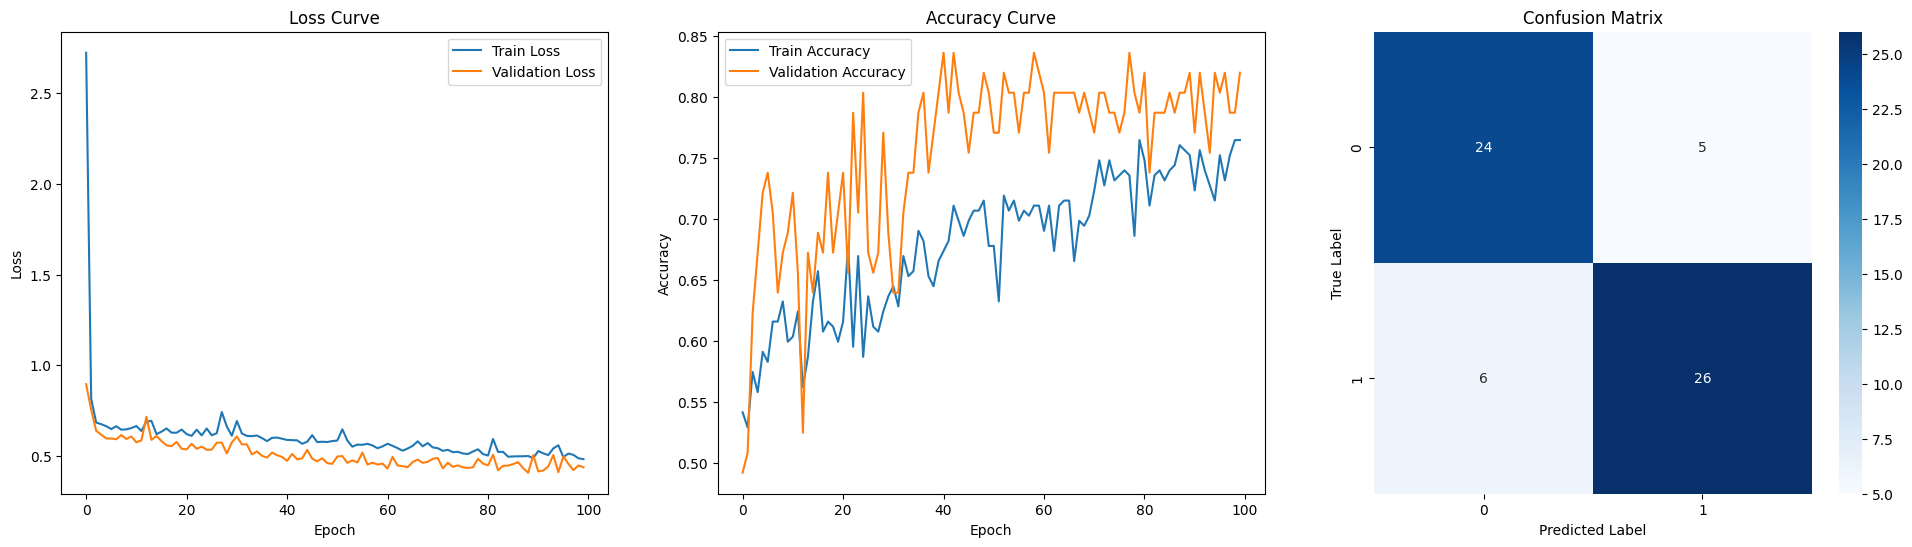

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 기존 학습 그래프
plt.figure(figsize=(24, 6))

#  손실(Loss) 그래프
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# 정확도(Accuracy) 그래프
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

# 혼동 행렬(Confusion Matrix) 시각화
y_pred = model.predict(X_test)  # 테스트 데이터 예측
y_pred_class = (model.predict(X_test) > 0.5).astype(int)  # 0.5 기준으로 변환
conf_matrix = confusion_matrix(y_test, y_pred_class)  # 혼동 행렬 계산

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(2), yticklabels=range(2))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")